In [ ]:
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
#carregando os dados para o pandas
df_consultas=pd.read_csv('winequality-red.csv', sep = ';')

In [ ]:
#mostrando as características do dataset
df_consultas.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#mostrando as dimensões do dataset
df_consultas.shape

(1599, 12)

In [ ]:
#mostrando as "características" das colunas
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#analisando as "estatísticas do dataset"
df_consultas.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df_consultas['residual sugar'].median()

2.2

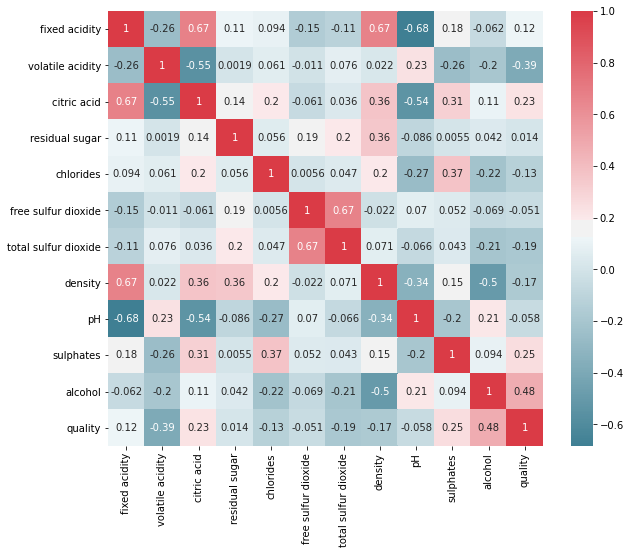

In [ ]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df_consultas.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

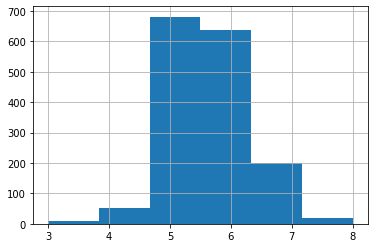

In [ ]:
#plotando o histograma de algumas variáveis 
df_consultas['quality'].hist(bins=len(df_consultas['quality'].unique()))

In [ ]:
df_consultas['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df_consultas['quality'][df_consultas['quality'] == 5].count()

681

In [ ]:
scaler = MinMaxScaler()

df_consultasNormalizada = df_consultas.copy()


df_consultasNormalizada[df_consultasNormalizada.columns] = scaler.fit_transform(df_consultasNormalizada)


In [ ]:
df_consultasNormalizada.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_qualitysaida = df_consultas['quality']
x_qualityentrada = df_consultasNormalizada.loc[:, df_consultasNormalizada.columns != 'quality']
y_qualitysaida

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x_qualityentrada, y_qualitysaida, test_size=0.30, random_state=1)
yTrain

126     5
810     5
635     5
598     6
880     5
       ..
715     6
905     5
1096    6
235     6
1061    8
Name: quality, Length: 1119, dtype: int64

In [ ]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(xTrain, yTrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
clf_KNN.predict([[0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846]])

array([5])

In [ ]:
y_pred = clf_KNN.predict(xTest)

print(accuracy_score(yTest, y_pred))
print(classification_report(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.5645833333333333
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480

[[  1   0   1   0   0   0]
 [  0   1  14   5   1   0]
 [  0   0 148  54   5   0]
 [  0   1  71 102  21   0]
 [  0   1   9  23  19   0]
 [  0   0   0   1   2   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_arvore = DecisionTreeClassifier(random_state=1) 

clf_arvore.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
y_predarvore = clf_arvore.predict(xTest)

print(accuracy_score(yTest, y_predarvore))
print(classification_report(yTest, y_predarvore))
print(confusion_matrix(yTest, y_predarvore))

0.6
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.10      0.11        21
           5       0.67      0.70      0.68       207
           6       0.65      0.55      0.60       195
           7       0.44      0.62      0.51        52
           8       0.33      0.33      0.33         3

    accuracy                           0.60       480
   macro avg       0.37      0.38      0.37       480
weighted avg       0.61      0.60      0.60       480

[[  0   0   0   2   0   0]
 [  2   2  10   4   3   0]
 [  3  10 145  38  11   0]
 [  0   2  60 108  25   0]
 [  0   0   3  15  32   2]
 [  0   0   0   0   2   1]]


In [ ]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_predfloresta = clf_floresta.predict(xTest)

print(accuracy_score(yTest, y_predfloresta))
print(classification_report(yTest, y_predfloresta))
print(confusion_matrix(yTest, y_predfloresta))

0.6791666666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.66       480

[[  0   0   2   0   0   0]
 [  0   0  14   7   0   0]
 [  0   0 167  38   2   0]
 [  0   0  46 136  13   0]
 [  0   0   5  24  23   0]
 [  0   0   0   1   2   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(xTrain, yTrain)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predsvm = clf_svm.predict(xTest)

print(accuracy_score(yTest, y_predsvm))
print(classification_report(yTest, y_predsvm))
print(confusion_matrix(yTest, y_predsvm))

0.5854166666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.61      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.49      0.59      0.53       480

[[  0   0   2   0   0   0]
 [  0   0  16   5   0   0]
 [  0   0 177  30   0   0]
 [  0   0  91 104   0   0]
 [  0   0   6  46   0   0]
 [  0   0   0   3   0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(xTrain, yTrain)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_predmlp = clf_mlp.predict(xTest)

print(accuracy_score(yTest, y_predmlp))
print(classification_report(yTest, y_predmlp))
print(confusion_matrix(yTest, y_predmlp))

0.6
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.80      0.71       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.56      0.60      0.57       480

[[  0   0   2   0   0   0]
 [  0   0  15   5   1   0]
 [  0   0 165  42   0   0]
 [  0   0  73 111  11   0]
 [  0   0   5  35  12   0]
 [  0   0   0   1   2   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
yTrain_th = yTrain.copy()
yTrain_th[yTrain_th<= 5] = 0
yTrain_th[yTrain_th > 5] = 1

yTest_th = yTest.copy()
yTest_th[yTest_th<= 5] = 0
yTest_th[yTest_th > 5] = 1

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(xTrain, yTrain_th)

y_predfloresta_bin = clf_floresta.predict(xTest)

print(accuracy_score(yTest_th, y_predfloresta_bin))
print(classification_report(yTest_th, y_predfloresta_bin))
print(confusion_matrix(yTest_th, y_predfloresta_bin))


0.8041666666666667
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       230
           1       0.82      0.80      0.81       250

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

[[186  44]
 [ 50 200]]


In [ ]:
yTrain_th = yTrain.copy()
yTrain_th[yTrain_th<= 5] = 0
yTrain_th[yTrain_th > 5] = 1
yTrain_th.value_counts()

1    605
0    514
Name: quality, dtype: int64